In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [143]:
data = pd.read_csv("/content/Employee_Retention.csv")

In [144]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [145]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [146]:
data.shape

(14999, 10)

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Visualization


In [148]:
import seaborn as sns

<Axes: xlabel='left', ylabel='count'>

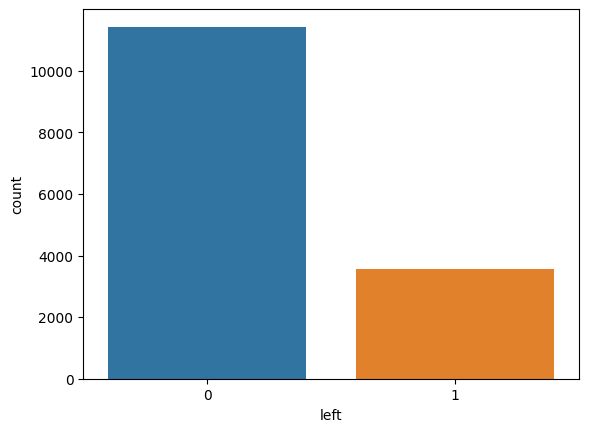

In [149]:
sns.countplot(data = data, x = "left")

<Axes: xlabel='salary', ylabel='count'>

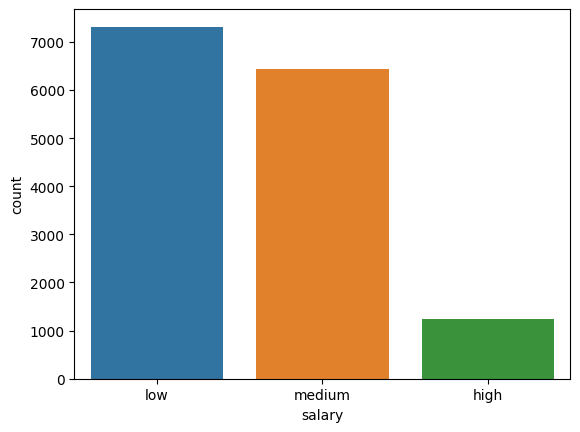

In [150]:
sns.countplot(x = "salary",data = data)

<Axes: xlabel='average_montly_hours', ylabel='Density'>

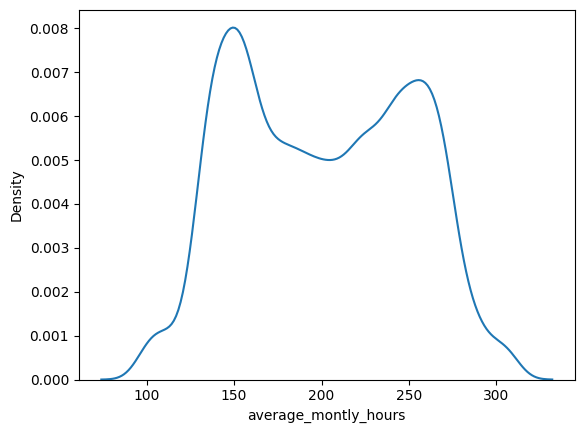

In [151]:
sns.distplot(data["average_montly_hours"],hist = False)

In [152]:
data['time_spend_company'].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7])

<Axes: xlabel='time_spend_company', ylabel='count'>

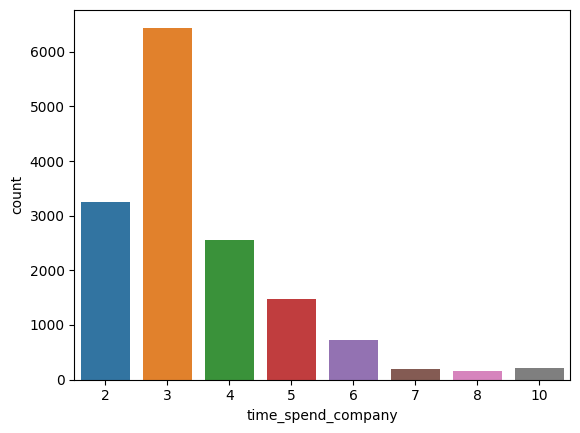

In [153]:
sns.countplot(x =data['time_spend_company'],data = data )

<Axes: xlabel='Department'>

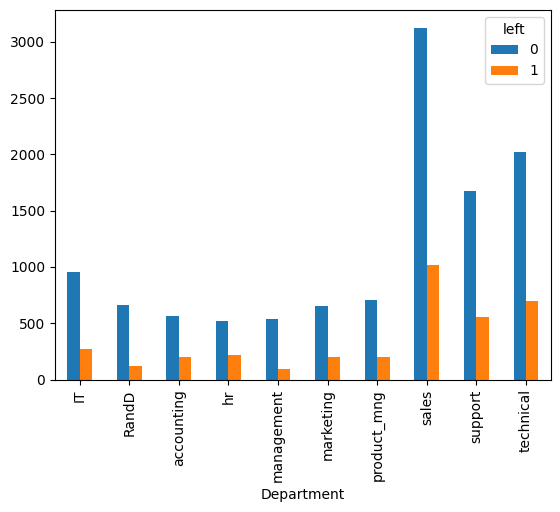

In [154]:
pd.crosstab(data.Department,data.left).plot(kind="bar")

<Axes: xlabel='time_spend_company'>

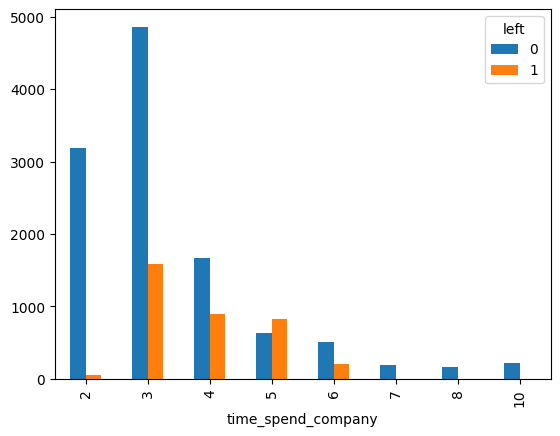

In [155]:
pd.crosstab(data.time_spend_company,data.left).plot(kind="bar")

<Axes: xlabel='salary'>

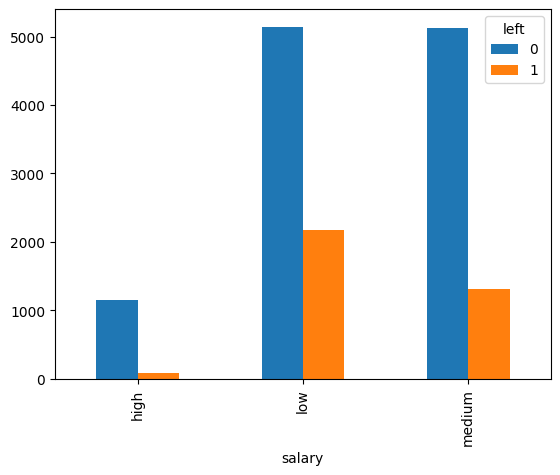

In [156]:
pd.crosstab(data.salary,data.left).plot(kind="bar")

In [157]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

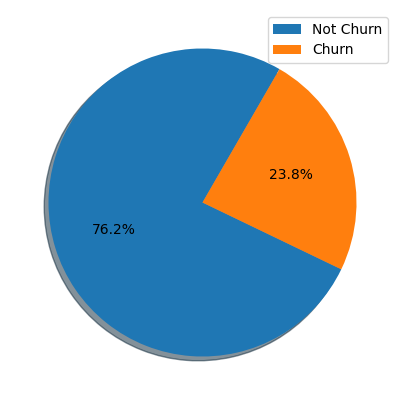

In [158]:
plt.figure(figsize=(6,5))
plt.pie(data.left.value_counts(),explode=[0,0],startangle=60,autopct='%1.1f%%',shadow=True)   #explode [0,0.1]
plt.legend(labels=['Not Churn','Churn'],loc='upper right')
plt.show()

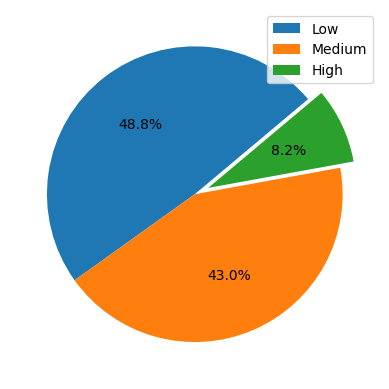

In [159]:
plt.pie(data.salary.value_counts(),explode = [0,0,0.1],startangle = 40,autopct = '%1.1f%%',shadow = False)
plt.legend(labels=['Low','Medium','High'],loc='upper right')
plt.show()

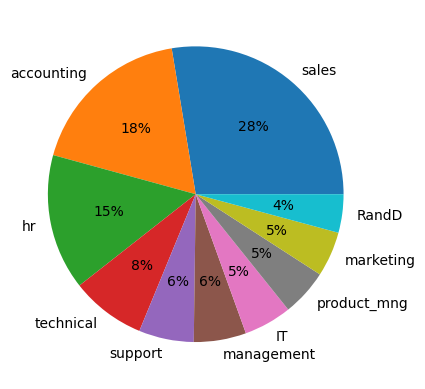

In [160]:
d=data.Department.unique()
plt.pie(data.Department.value_counts(),labels = d,autopct = '%1.0f%%')
plt.show()

In [161]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [162]:
log_reg = LogisticRegression(max_iter = 200)

In [163]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['salary']= label_encoder.fit_transform(data['salary'])
data["Department"] = label_encoder.fit_transform(data['Department'])


In [164]:
data.Department.unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

In [165]:
data.head()   # high = 0, low - 1   Medium - 2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [166]:
from sklearn.model_selection import train_test_split

In [167]:
x = data.drop(["left"],axis =1 )
y = data['left']

In [168]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [169]:
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [170]:
from sklearn.metrics import accuracy_score
log_reg.score(x_train,y_train)

0.7686905502711352

In [171]:
log_reg.score(x_test,y_test)

0.7629333333333334

In [172]:
from sklearn.tree import DecisionTreeClassifier

In [173]:
d_tree = DecisionTreeClassifier()

In [174]:
d_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [175]:
d_tree.score(x_train,y_train)

1.0

In [176]:
d_tree.score(x_test,y_test)

0.9781333333333333

In [177]:
from sklearn.neighbors import KNeighborsClassifier
k_nearest = KNeighborsClassifier()
k_nearest.fit(x_train,y_train)
k_nearest.score(x_train,y_train)

0.9535069783980799

In [178]:
k_nearest.score(x_test,y_test)

0.9298666666666666